In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


import matplotlib.pyplot as plt
import numpy as np

In [2]:
digits = load_digits()

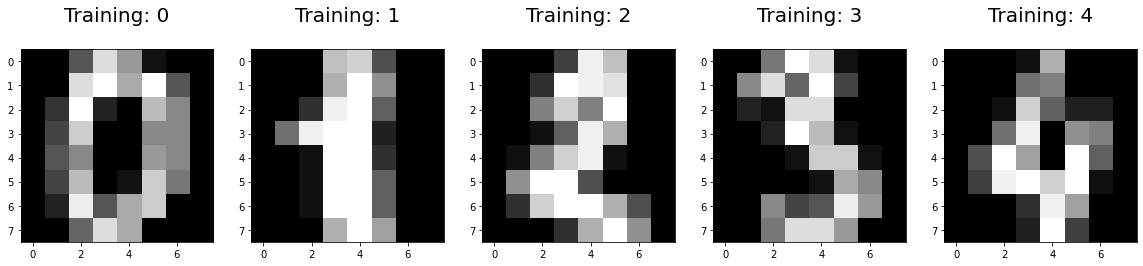

In [3]:
plt.figure(figsize=(20, 4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)


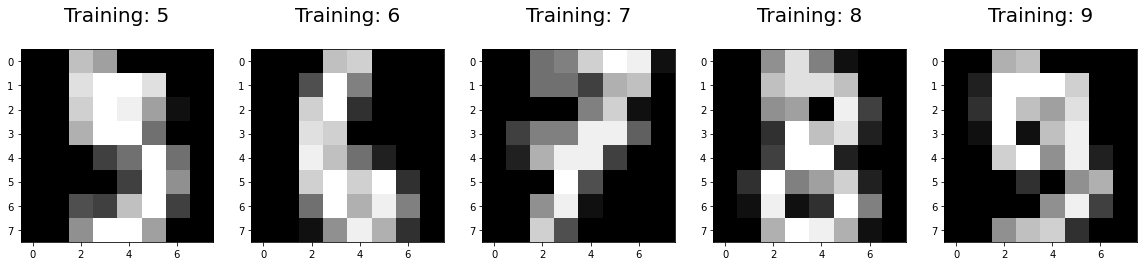

In [4]:
plt.figure(figsize=(20, 4))
for index, (image, label) in enumerate(zip(digits.data[5:10], digits.target[5:10])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

In [6]:
print(x_train.shape, x_test.shape)

(1437, 64) (360, 64)


In [7]:
from sklearn.neighbors import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier

In [8]:
clf = NearestCentroid()
clf.fit(x_train, y_train)

NearestCentroid()

In [9]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [10]:
y_pred_clf = clf.predict(x_test)
accuracy_score(y_pred_clf, y_test)

0.9083333333333333

In [11]:
y_pred_knn = knn.predict(x_test)
score = accuracy_score(y_pred_knn, y_test)
print(score)

0.9861111111111112


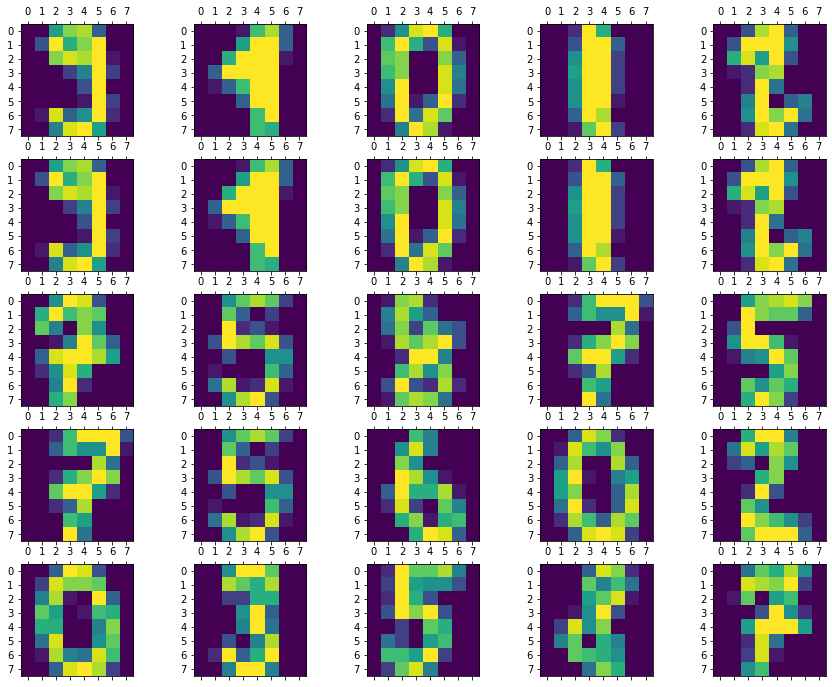

In [12]:
import random

x_random = [random.choice(x_test) for i in range(5)]
neighbors = knn.kneighbors(X=x_random, n_neighbors=5, return_distance=False)

fig, ax = plt.subplots(5, 5)
fig.set_size_inches(15, 12)
for i in range(5):
    for j in range(5):
        ax[i][j].matshow(digits.images[neighbors[i][j]])
        #print(digits.target[neighbors[i][j]])

Метод k-ближайших соседей при k = 5 показывает лучшие результаты в сравнении с методом ближайших центроидов 

In [13]:
knn1 = KNeighborsClassifier(n_neighbors = 1)
knn1.fit(x_train,y_train)

y_pred_knn1 = knn1.predict(x_test)
accuracy_score(y_pred_knn1, y_test)

0.9833333333333333

In [14]:
knn2 = KNeighborsClassifier(n_neighbors = 3)
knn2.fit(x_train,y_train)

y_pred_knn2 = knn2.predict(x_test)
accuracy_score(y_pred_knn2, y_test)

0.9833333333333333

In [15]:
knn3 = KNeighborsClassifier(n_neighbors = 10)
knn3.fit(x_train,y_train)

y_pred_knn3 = knn3.predict(x_test)
accuracy_score(y_pred_knn3, y_test)

0.9861111111111112

In [16]:
knn4 = KNeighborsClassifier(n_neighbors = 25)
knn4.fit(x_train,y_train)

y_pred_knn4 = knn4.predict(x_test)
accuracy_score(y_pred_knn4, y_test)

0.975

In [17]:
knn5 = KNeighborsClassifier(n_neighbors = 100)
knn5.fit(x_train,y_train)

y_pred_knn5 = knn5.predict(x_test)
accuracy_score(y_pred_knn5, y_test)

0.9361111111111111

Как можно заметить качество моделей падает при увеличении k

In [18]:
from sklearn import metrics
matrix = metrics.confusion_matrix(y_test, y_pred_knn)
print(matrix)

[[33  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  1  0  0]
 [ 0  0  0 44  0  0  0  0  0  0]
 [ 0  0  0  0 25  0  0  0  0  0]
 [ 0  0  0  0  0 33  0  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 0  0  0  0  0  0  0  0 35  0]
 [ 0  1  0  2  0  0  0  0  1 37]]


Text(0.5, 1.0, 'Accuracy Score: 0.9861111111111112')

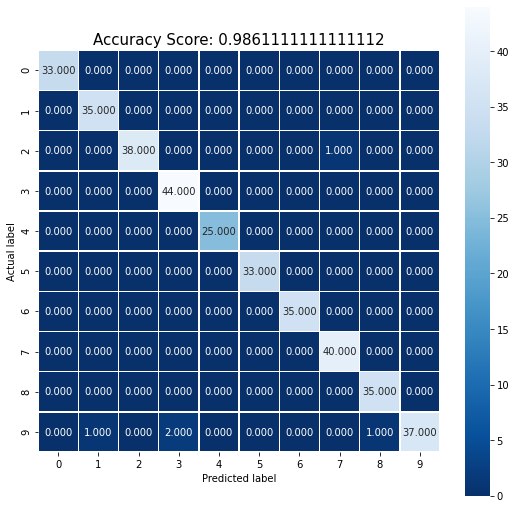

In [21]:
import seaborn as sns

plt.figure(figsize=(9,9))
sns.heatmap(matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

In [22]:
for i in range(len(y_test)):
    if y_pred_knn[i] != y_test[i]:
        print("На данном тесте классификатор ошибается: ", x_test[i])
        print("Номер теста -", i, "Предсказанный класс -", y_pred_knn[i], "Настоящий класс объекта", y_test[i])

На данном тесте классификатор ошибается:  [ 0.  1. 12. 15. 10.  2.  0.  0.  0.  4. 14.  1.  6. 12.  2.  0.  0.  7.
 15.  0.  1. 14.  4.  0.  0.  3. 15. 12. 15. 10.  0.  0.  0.  0.  3. 15.
  1.  0.  0.  0.  0.  0.  0.  3. 13.  1.  0.  0.  0.  0.  0.  0. 10.  6.
  0.  0.  0.  0. 11. 12. 13.  4.  0.  0.]
Номер теста - 209 Предсказанный класс - 8 Настоящий класс объекта 9
На данном тесте классификатор ошибается:  [ 0.  0.  4. 12. 16. 16.  4.  0.  0.  0.  9.  7.  4. 14. 12.  0.  0.  0.
  0.  0.  0. 11. 14.  0.  0.  0.  0.  0.  3. 16.  6.  0.  0.  0.  0.  1.
 13.  6.  0.  0.  0.  0.  1. 12.  8.  0.  0.  0.  0.  0.  6. 16.  9.  5.
  0.  0.  0.  0.  3. 12. 13.  9.  0.  0.]
Номер теста - 232 Предсказанный класс - 7 Настоящий класс объекта 2
На данном тесте классификатор ошибается:  [ 0.  0.  7. 16. 16.  8.  0.  0.  0.  0. 14. 12. 11. 14.  0.  0.  0.  0.
 11. 15. 16. 12.  0.  0.  0.  0.  5. 15. 15.  4.  0.  0.  0.  0.  0.  3.
 12. 14.  0.  0.  0.  1. 10.  0.  7. 15.  0.  0.  0.  1. 14.  6. 13. 1